In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
from Definition import grouping, chart, precentage_top, many_chart_pie

# 📊 Game Sales Analysis by Platform and Region

---

### 🔎 Objectives:

1. **Analyze game sales for selected platforms across key regional markets**  
   *(North America, Europe, and Japan)*

2. **Examine the market share distribution of game sales by platform**

# Loading Interesting Part of Data File  


In [3]:
game_sales = pd.read_csv('./vgsales.csv', usecols=['Platform','Name', 'Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'])
game_sales

,Name,Platform,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,2003.0,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,2010.0,0.00,0.01,0.00,0.00,0.01


# Data validation and cleaning

In [4]:
game_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   NA_Sales      16598 non-null  float64
 4   EU_Sales      16598 non-null  float64
 5   JP_Sales      16598 non-null  float64
 6   Other_Sales   16598 non-null  float64
 7   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(2)
memory usage: 1.0+ MB


## Detecting duplicates in the dataset

In [5]:
game_sales[game_sales.duplicated()].value_counts()

Series([], Name: count, dtype: int64)

There are no duplicate records in the database.


## Searching the dataset for null values

In [6]:
null_obj = game_sales[game_sales.isnull().any(axis=1)]
null_obj

,Name,Platform,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,Madden NFL 2004,PS2,NaN,4.26,0.26,0.01,0.71,5.23
377,FIFA Soccer 2004,PS2,NaN,0.59,2.36,0.04,0.51,3.49
431,LEGO Batman: The Videogame,Wii,NaN,1.86,1.02,0.00,0.29,3.17
470,wwe Smackdown vs. Raw 2006,PS2,NaN,1.57,1.02,0.00,0.41,3.00
607,Space Invaders,2600,NaN,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...
16307,Freaky Flyers,GC,NaN,0.01,0.00,0.00,0.00,0.01
16327,Inversion,PC,NaN,0.01,0.00,0.00,0.00,0.01
16366,Hakuouki: Shinsengumi Kitan,PS3,NaN,0.01,0.00,0.00,0.00,0.01
16427,Virtua Quest,GC,NaN,0.01,0.00,0.00,0.00,0.01


## Calculating precentage of missing values

In [7]:
pr_n_r=null_obj.shape[0]/game_sales.shape[0]*100
pr_n_r

1.6327268345583803

Since null values make up less than 2% of the data, we can remove them without significant impact.

In [8]:
game_sales.dropna(inplace=True)
game_sales

,Name,Platform,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,2003.0,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,2010.0,0.00,0.01,0.00,0.00,0.01


## Data distribution analysis

In [15]:
game_sales.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000
mean,2006.406443,0.265415,0.147554,0.078661,0.048325,0.540232
std,5.828981,0.821591,0.508766,0.311557,0.189885,1.565732
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Based on the mean of global sales (0.54) and the median (0.17), it can be concluded that a relatively small number of games achieved outstanding sales. This is further supported by the standard deviation, which also indicates a significant disparity in sales figures.

# Sale for platform

In [16]:
df_org = game_sales  # The dataset you're working with,
asc = [True, False]  # Sorting order,
value_type = 'head'  # Determines whether to select the top ('head') or bottom ('tail') part of the data,
display_mode = 'all'  # Specifies what data to display: 'head', 'tail', or 'all'
n_plt = 3 # Number of platforms to select based on the highest sales
n_disp = 0  # Number of records to display after sorting 

In [17]:
df_agg = 'sum'  # The aggregation function
plt_kind = 'bar'  # Type of plot, 
plt_size = (16, 10)  # Size of the plot (width, height)

## GLOBAL sales

### Grouping data

In [18]:
category = ['Year', 'Platform']  # Columns to group by, 
group_key = 'Global_Sales'  # The column that will be aggregated (summed),
sort_values = ['Year', 'Global_Sales']  # Columns by which the data will be sorted,

In [19]:
gs_platform = grouping(df_org=df_org,category=category,group_key=group_key,
                sort_values=sort_values,asc=asc,value_type=value_type,
                display_mode=display_mode,n_plt=n_plt,n_disp=n_disp)
gs_platform.head()

,,Global_Sales
Year,Platform,
2000.0,PS2,39.11
2001.0,PS2,166.43
2002.0,PS2,205.40
2003.0,PS2,184.29
2004.0,PS2,211.78


### Visualization

In [20]:
df = gs_platform  # The data you want to visualize (result of the previous grouping)
df_ind = 'Year'  # The column to be used as the index (X-axis) in the plot
df_col = 'Platform'  # The column to be used for grouping (legend in the plot)
df_val = 'Global_Sales'  # The column for the values to be aggregated and plotted

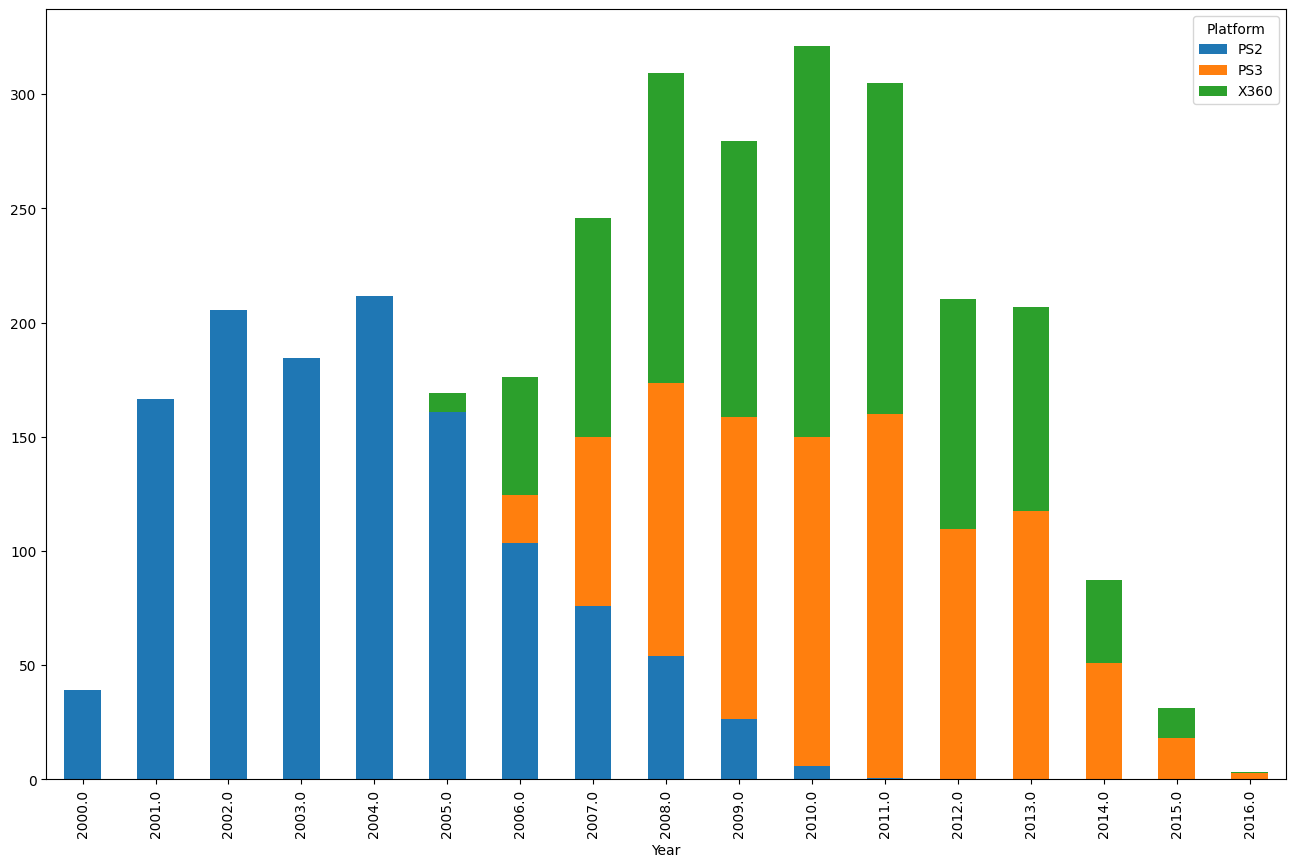

In [21]:
gs_chart = chart(df=df,df_ind=df_ind,df_col=df_col,df_val=df_val,
                 df_agg=df_agg,plt_kind=plt_kind,plt_size=plt_size)
gs_chart

## NORTH AMERICA sales

### Grouping Data

In [22]:
category = ['Year', 'Platform']  # Columns to group by, 
group_key = 'NA_Sales'  # The column that will be aggregated (summed),
sort_values = ['Year', 'NA_Sales']  # Columns by which the data will be sorted,

In [24]:
na_platform = grouping(df_org=df_org,category=category,group_key=group_key,
                sort_values=sort_values,asc=asc,value_type=value_type,
                display_mode=display_mode,n_plt=n_plt,n_disp=n_disp)
na_platform.head()

,,NA_Sales
Year,Platform,
2000.0,PS2,16.08
2001.0,PS2,79.49
2002.0,PS2,96.54
2003.0,PS2,83.54
2004.0,PS2,96.78


### Visualization

In [25]:
df = na_platform  # The data you want to visualize (result of the previous grouping)
df_ind = 'Year'  # The column to be used as the index (X-axis) in the plot
df_col = 'Platform'  # The column to be used for grouping (legend in the plot)
df_val = 'NA_Sales'  # The column for the values to be aggregated and plotted


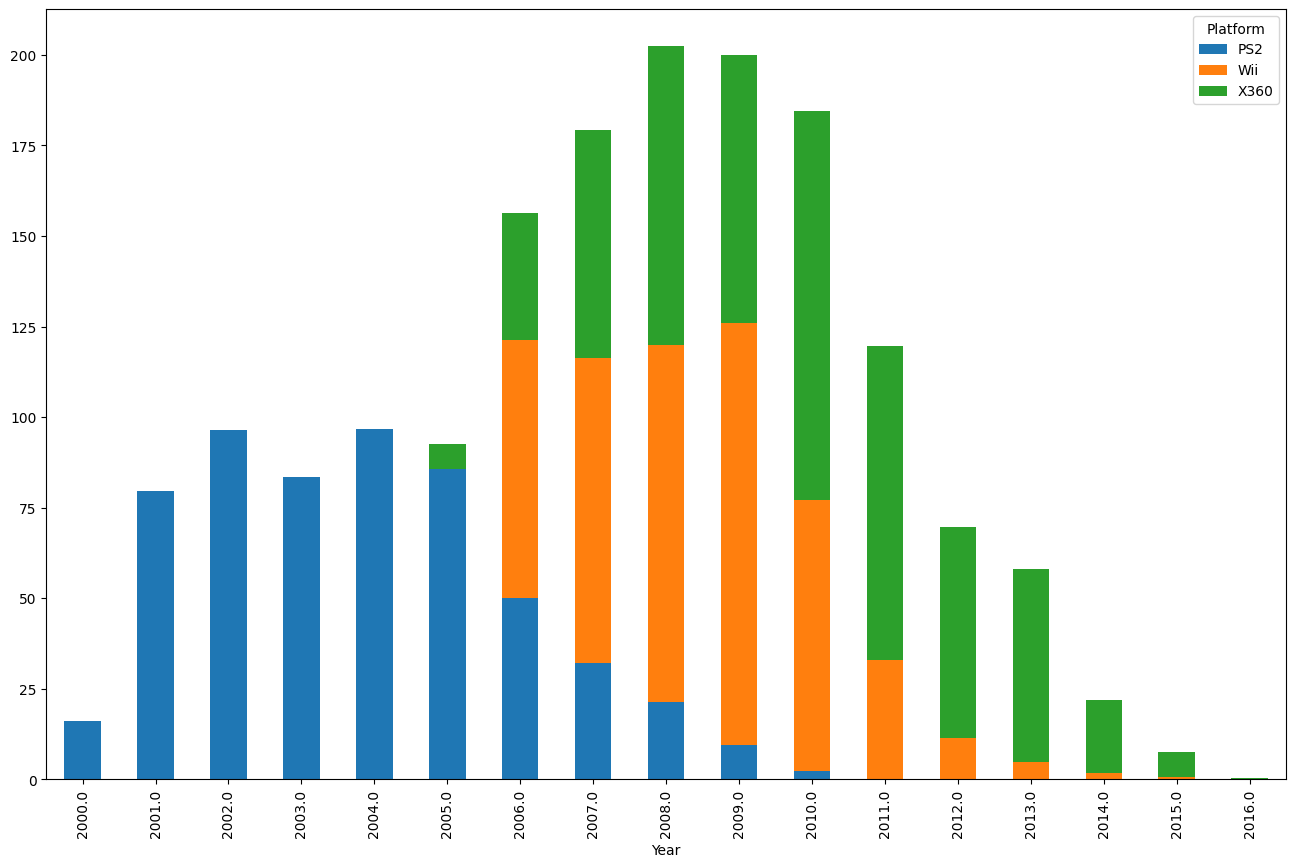

In [26]:
na_chart = chart(df=df,df_ind=df_ind,df_col=df_col,df_val=df_val,
                 df_agg=df_agg,plt_kind=plt_kind,plt_size=plt_size)
na_chart

## EUROPE sales 

### Grouping data

In [27]:
category = ['Year', 'Platform']  # Columns to group by, 
group_key = 'EU_Sales'  # The column that will be aggregated (summed),
sort_values = ['Year', 'EU_Sales']  # Columns by which the data will be sorted,

In [32]:
eu_platform = grouping(df_org=df_org,category=category,group_key=group_key,
                sort_values=sort_values,asc=asc,value_type=value_type,
                display_mode=display_mode,n_plt=n_plt,n_disp=n_disp)
eu_platform.head()

,,EU_Sales
Year,Platform,
2000.0,PS2,10.64
2001.0,PS2,52.37
2002.0,PS2,65.27
2003.0,PS2,61.20
2004.0,PS2,56.01


### Visualization

In [33]:
df = eu_platform  # The data you want to visualize (result of the previous grouping)
df_ind = 'Year'  # The column to be used as the index (X-axis) in the plot
df_col = 'Platform'  # The column to be used for grouping (legend in the plot)
df_val = 'EU_Sales'  # The column for the values to be aggregated and plotted


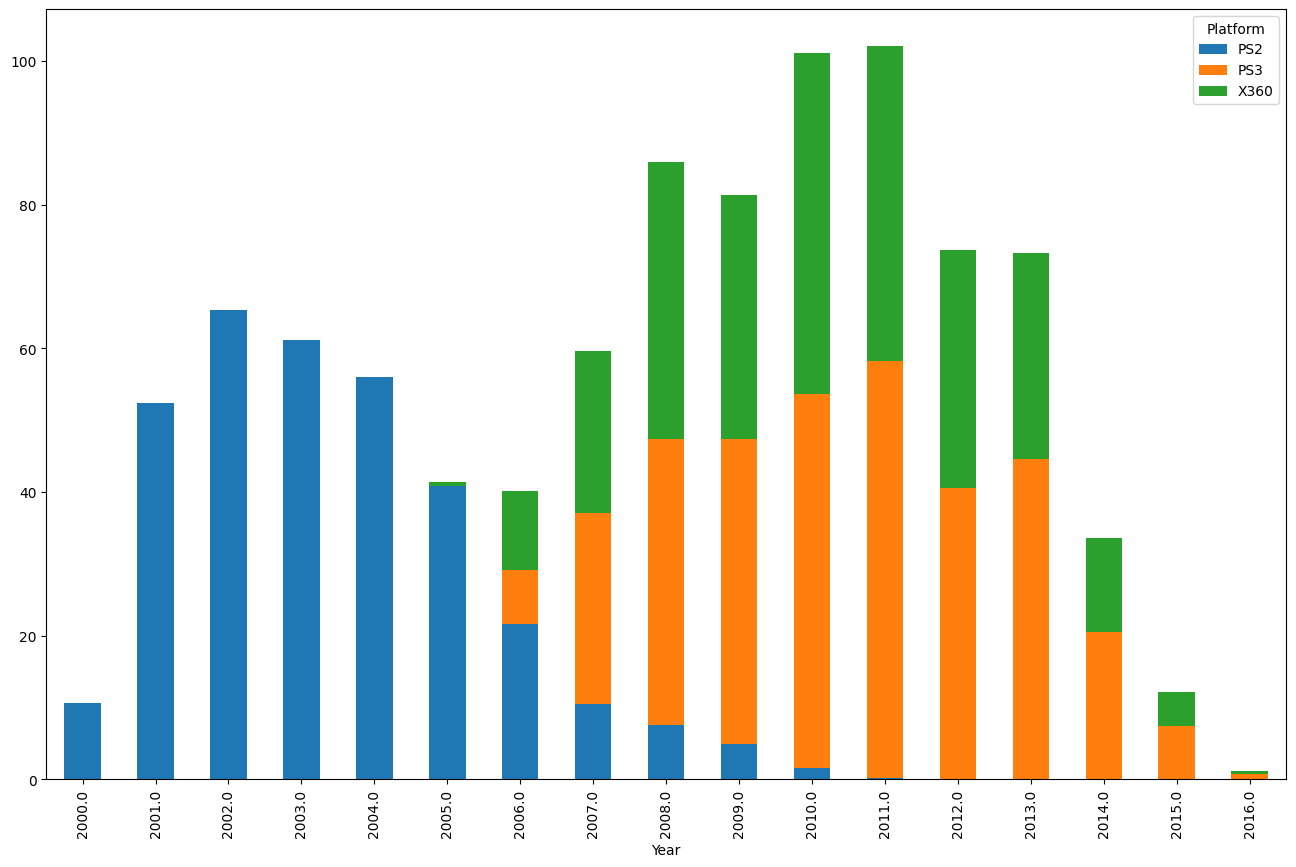

In [34]:
eu_chart = chart(df=df,df_ind=df_ind,df_col=df_col,df_val=df_val,
                 df_agg=df_agg,plt_kind=plt_kind,plt_size=plt_size)
eu_chart

## JAPAN sales

### Grouping data

In [35]:
category = ['Year', 'Platform']  # Columns to group by, 
group_key = 'JP_Sales'  # The column that will be aggregated (summed),
sort_values = ['Year', 'JP_Sales']  # Columns by which the data will be sorted,

In [36]:
jp_platform = grouping(df_org=df_org,category=category,group_key=group_key,
                sort_values=sort_values,asc=asc,value_type=value_type,
                display_mode=display_mode,n_plt=n_plt,n_disp=n_disp)
jp_platform.head()

,,JP_Sales
Year,Platform,
1985.0,DS,0.02
1994.0,PS,2.67
1995.0,PS,9.54
1996.0,PS,17.82
1997.0,PS,33.10


### Visualization

In [37]:
df = jp_platform  # The data you want to visualize (result of the previous grouping)
df_ind = 'Year'  # The column to be used as the index (X-axis) in the plot
df_col = 'Platform'  # The column to be used for grouping (legend in the plot)
df_val = 'JP_Sales'  # The column for the values to be aggregated and plotted


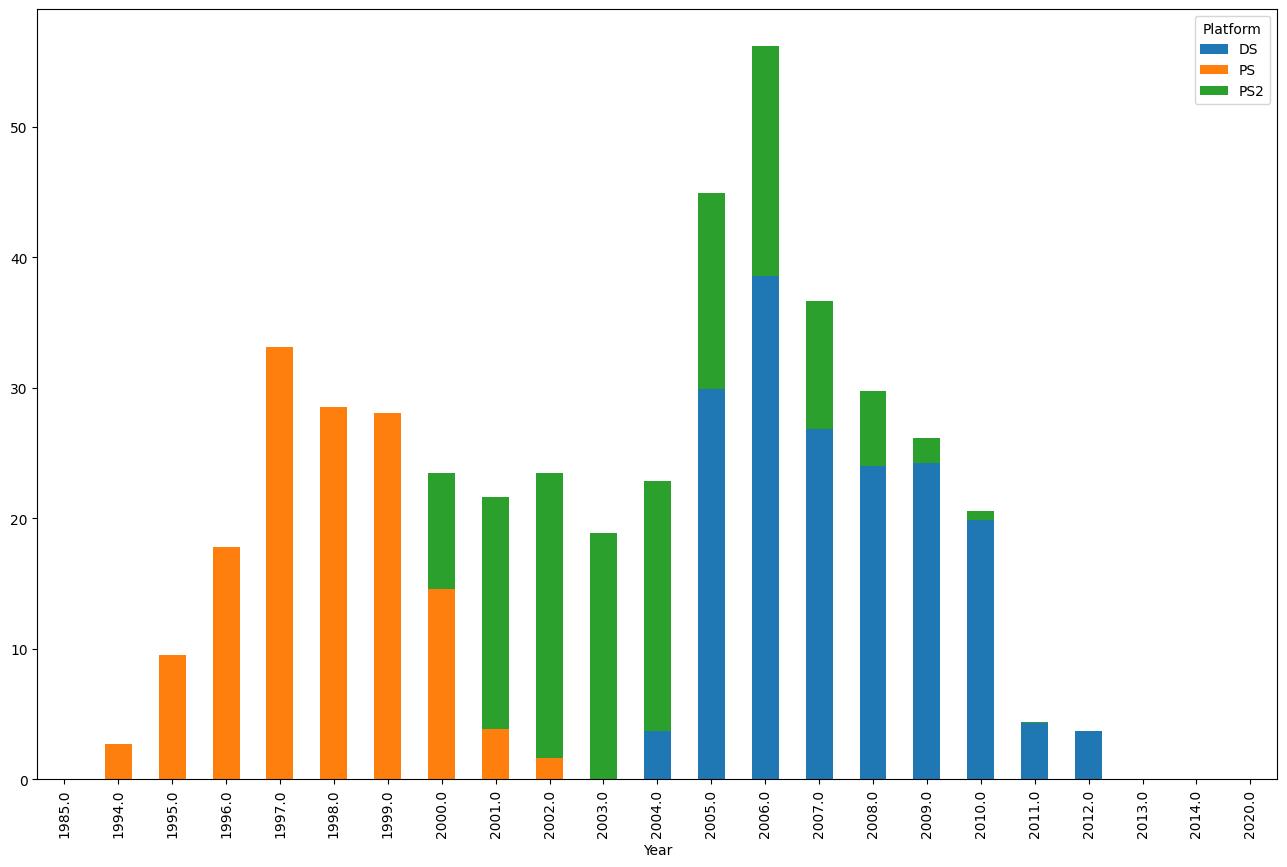

In [38]:
jp_chart = chart(df=df,df_ind=df_ind,df_col=df_col,df_val=df_val,
                 df_agg=df_agg,plt_kind=plt_kind,plt_size=plt_size)
jp_chart

## OTHER sales

### Grouping data

In [39]:
category = ['Year', 'Platform']  # Columns to group by, 
group_key = 'Other_Sales'  # The column that will be aggregated (summed),
sort_values = ['Year', 'Other_Sales']  # Columns by which the data will be sorted,

In [41]:
oth_platform = grouping(df_org=df_org,category=category,group_key=group_key,
                sort_values=sort_values,asc=asc,value_type=value_type,
                display_mode=display_mode,n_plt=n_plt,n_disp=n_disp)
oth_platform.head()

,,Other_Sales
Year,Platform,
2000.0,PS2,3.58
2001.0,PS2,16.78
2002.0,PS2,21.72
2003.0,PS2,20.69
2004.0,PS2,39.85


### Visualization

In [42]:
df = oth_platform  # The data you want to visualize (result of the previous grouping)
df_ind = 'Year'  # The column to be used as the index (X-axis) in the plot
df_col = 'Platform'  # The column to be used for grouping (legend in the plot)
df_val = 'Other_Sales'  # The column for the values to be aggregated and plotted

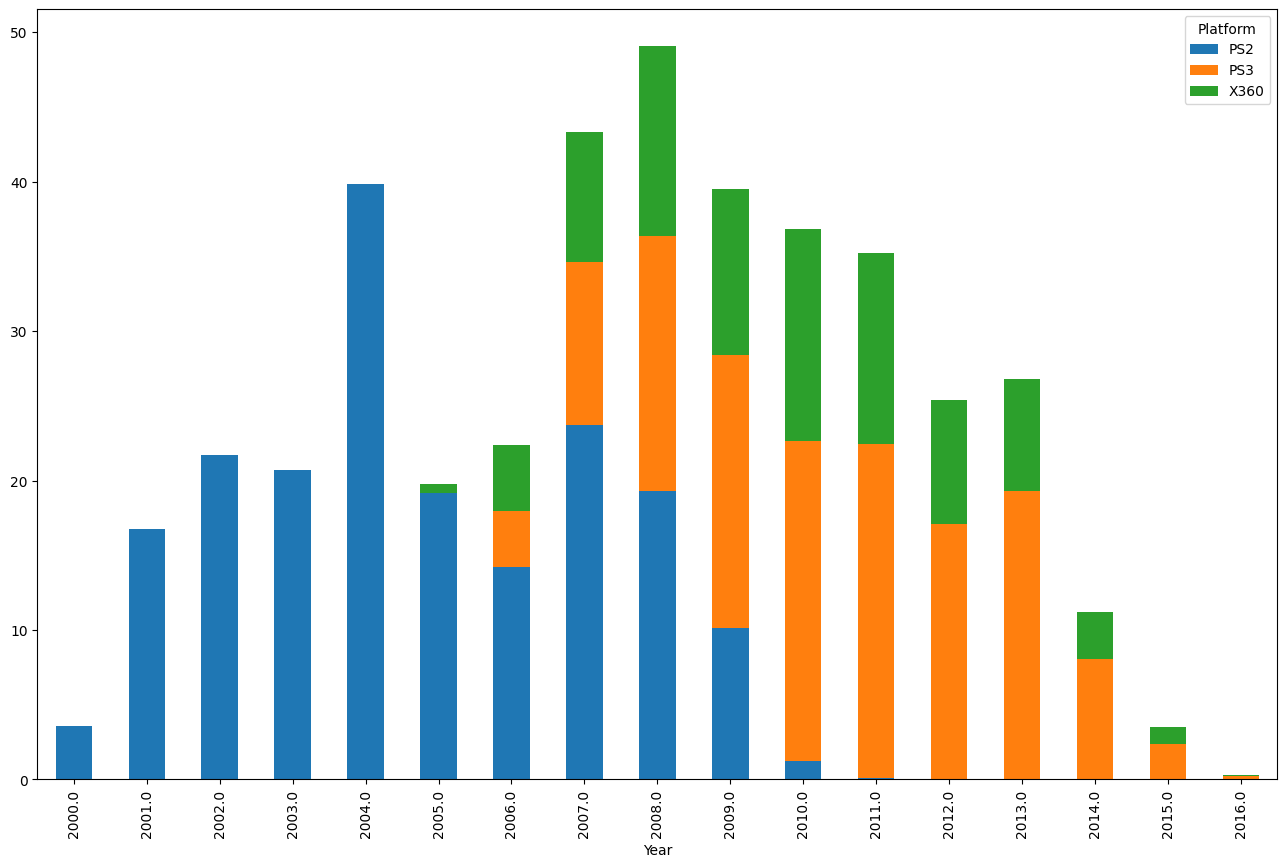

In [43]:
oth_chart = chart(df=df,df_ind=df_ind,df_col=df_col,df_val=df_val,
                 df_agg=df_agg,plt_kind=plt_kind,plt_size=plt_size)
oth_chart

# Market Share Analysis

In [48]:
gs_df = game_sales  # The dataset you're working with,
gs_key = 'Global_Sales' # The column that will be aggregated (summed),
n_plt = 4 # Number of platforms to select based on the highest sales

## NORTH AMERICA 

In [49]:
region_key = 'NA_Sales' # The column that will be aggregated (summed),

In [50]:
na_precentage = precentage_top(gs_df=gs_df,gs_key=gs_key,region_key=region_key,n_plt=n_plt)
na_precentage

Platform
PS2     46.0
PS3     41.0
Wii     55.0
X360    61.0
dtype: float64

## EUROPE

In [51]:
region_key = 'EU_Sales' # The column that will be aggregated (summed),

In [52]:
eu_precentage = precentage_top(gs_df=gs_df,gs_key=gs_key,region_key=region_key,n_plt=n_plt)
eu_precentage

Platform
PS2     27.0
PS3     36.0
Wii     29.0
X360    29.0
dtype: float64

## JAPAN

In [53]:
region_key = 'JP_Sales' # The column that will be aggregated (summed),

In [54]:
jp_precentage = precentage_top(gs_df=gs_df,gs_key=gs_key,region_key=region_key,n_plt=n_plt)
jp_precentage

Platform
PS2     11.0
PS3      8.0
Wii      8.0
X360     1.0
dtype: float64

## OTHER

In [55]:
region_key = 'Other_Sales' # The column that will be aggregated (summed),

In [56]:
oth_precentage = precentage_top(gs_df=gs_df,gs_key=gs_key,region_key=region_key,n_plt=n_plt)
oth_precentage

Platform
PS2     15.0
PS3     15.0
Wii      9.0
X360     9.0
dtype: float64

## Chart Market Share Distribution in Platform Sales

In [57]:
df_precent = pd.concat([na_precentage,eu_precentage,jp_precentage,oth_precentage],axis=1)
df_precent.columns= ['NA precentage','EU precentage','JP precentage','Other precentage']
df_precent.transpose()

Platform,PS2,PS3,Wii,X360
NA precentage,46.0,41.0,55.0,61.0
EU precentage,27.0,36.0,29.0,29.0
JP precentage,11.0,8.0,8.0,1.0
Other precentage,15.0,15.0,9.0,9.0


### Visualisation

In [58]:
df=df_precent.transpose()
plt_size = (6, 6)

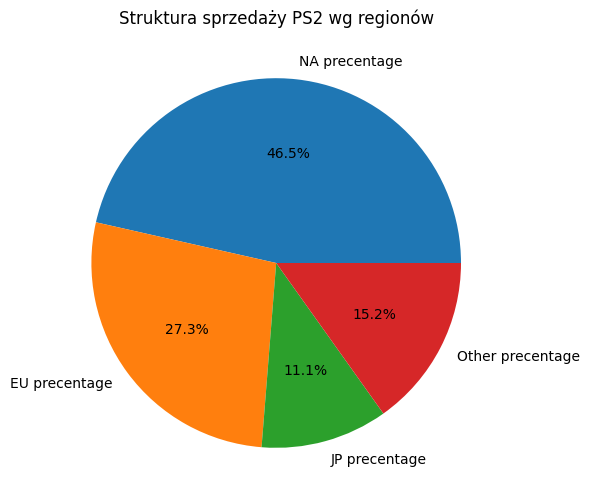

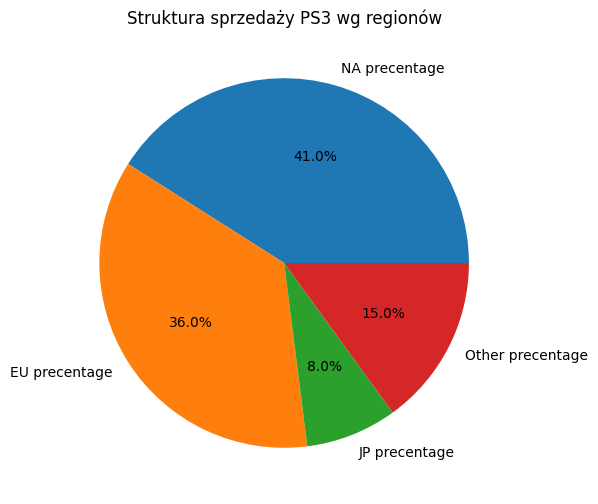

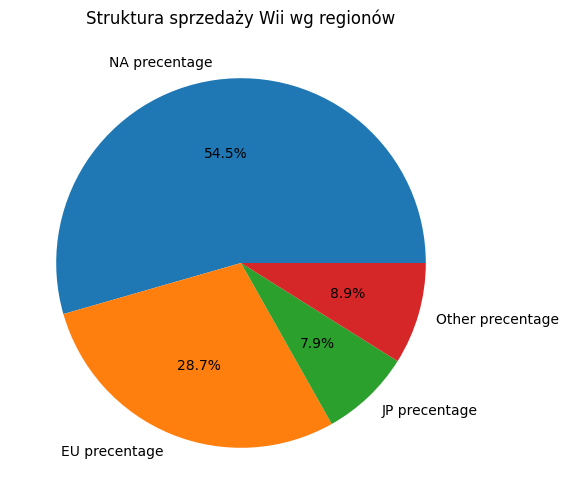

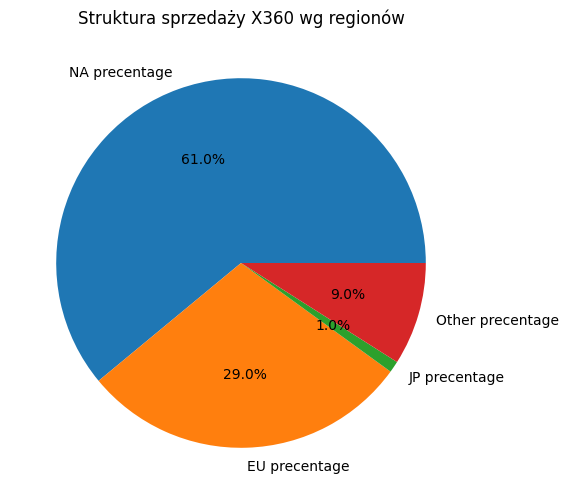

In [60]:
prec = many_chart_pie(df=df, plt_size=plt_size)
prec